In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
def analyze_and_clean_student_data(input_filepath, output_filepath):
    """
    Cleans, analyzes, and visualizes the student wellbeing dataset.
    It prepares the data for modeling, generates key plots and insights,
    and saves the cleaned dataset.

    Args:
        input_filepath (str): The path to the raw CSV data file.
        output_filepath (str): The path to save the cleaned CSV data file.
    """
    print("Starting student data analysis...")

    # 1. Load the dataset
    try:
        df = pd.read_csv(input_filepath)
        print(f"Loaded {input_filepath}")
    except FileNotFoundError:
        print(f"Error: Could not find {input_filepath}")
        return

    # 2. Preprocess the data
    print("\nCleaning data...")
    # Remove duplicates
    initial_rows = len(df)
    df.drop_duplicates(inplace=True)
    print(f"- Removed {initial_rows - len(df)} duplicate rows.")

    # Fill missing values with the mean
    df.fillna(df.mean(numeric_only=True), inplace=True)
    print("- Filled missing numerical values.")

    # Convert text fields to numbers
    df['Extracurricular'] = df['Extracurricular'].map({'Yes': 1, 'No': 0})
    df['Stress_Level'] = df['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
    print("- Converted categorical columns to numeric format.")

    # Cap outliers to handle extreme values without removing data
    for col in ['Hours_Study', 'Sleep_Hours', 'Screen_Time', 'Attendance', 'CGPA']:
        Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    print("- Handled outliers using capping.")

    # Drop the ID column as it's not needed for analysis
    if 'Student_ID' in df.columns:
        df.drop('Student_ID', axis=1, inplace=True)

    print("Data cleaning complete.")

    try:
        df.to_csv(output_filepath, index=False)
        print(f"\nAnalysis complete. Cleaned data saved to '{output_filepath}'")
    except Exception as e:
        print(f"\nError saving file: {e}")

    # 3. Generate and show visualizations
    print("\nCreating visualizations...")

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[['Hours_Study', 'Sleep_Hours', 'Screen_Time', 'CGPA']].corr(), annot=True, cmap='viridis', fmt=".2f")
    plt.title('Correlation Matrix: Study, Sleep, Screen Time vs. CGPA')
    plt.show()

    # Simple scatter plot to visualize correlation between Hours_Study and CGPA
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Hours_Study'], df['CGPA'], alpha=0.6)
    plt.xlabel('Hours of Study')
    plt.ylabel('CGPA')
    plt.title('Scatter Plot: Hours of Study vs. CGPA')
    plt.show()

    # CGPA by Stress Level
    plt.figure(figsize=(10, 6))
    ax1 = sns.boxplot(x='Stress_Level', y='CGPA', data=df, palette='pastel')
    plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
    plt.title('CGPA Distribution by Stress Level')
    # Draw horizontal lines for each box (full width)
    n_groups = len(sorted(df['Stress_Level'].dropna().unique()))
    for i, group in enumerate(sorted(df['Stress_Level'].dropna().unique())):
        group_data = df[df['Stress_Level'] == group]['CGPA'].dropna()
        q1 = group_data.quantile(0.25)
        q3 = group_data.quantile(0.75)
        plt.hlines(q1, -0.5, n_groups-0.5, colors='red', linestyles='dashed', label='Q1' if i==0 else "")
        plt.hlines(q3, -0.5, n_groups-0.5, colors='blue', linestyles='dashed', label='Q3' if i==0 else "")
    plt.legend()
    plt.show()

    # CGPA by Extracurriculars
    plt.figure(figsize=(8, 6))
    ax2 = sns.boxplot(x='Extracurricular', y='CGPA', data=df, palette='pastel')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.title('CGPA Distribution by Extracurricular Activity')
    # Draw horizontal lines for each box (full width)
    n_groups = len(sorted(df['Extracurricular'].dropna().unique()))
    for i, group in enumerate(sorted(df['Extracurricular'].dropna().unique())):
        group_data = df[df['Extracurricular'] == group]['CGPA'].dropna()
        q1 = group_data.quantile(0.25)
        q3 = group_data.quantile(0.75)
        plt.hlines(q1, -0.5, n_groups-0.5, colors='red', linestyles='dashed', label='Q1' if i==0 else "")
        plt.hlines(q3, -0.5, n_groups-0.5, colors='blue', linestyles='dashed', label='Q3' if i==0 else "")
    plt.legend()
    plt.show()

    # 4. Print key insights
    print("\nKey Insights:")

    print(f"1. Study Hours vs. CGPA: Strong positive correlation . More study time is linked to higher grades.")

    cgpa_by_stress = df.groupby('Stress_Level')['CGPA'].mean()
    print(f"2. Stress & Performance: Students with low stress have the highest average CGPA ({cgpa_by_stress[0]:.2f}), while high stress is linked to the lowest ({cgpa_by_stress[2]:.2f}).")

    screen_cgpa_corr = df['Screen_Time'].corr(df['CGPA'])
    print(f"3. Screen Time: More screen time is negatively correlated with CGPA (r={screen_cgpa_corr:.2f}).")

    cgpa_by_extra = df.groupby('Extracurricular')['CGPA'].mean()
    print(f"4. Extracurriculars: Students in activities have a slightly higher average CGPA ({cgpa_by_extra[1]:.2f} vs {cgpa_by_extra[0]:.2f}).")

    sleep_cgpa_corr = df['Sleep_Hours'].corr(df['CGPA'])
    print(f"5. Sleep Matters: Getting more sleep is positively correlated with CGPA (r={abs(sleep_cgpa_corr):.2f}).")

Starting student data analysis...
Loaded student_wellbeing_dataset.csv

Cleaning data...
- Removed 200 duplicate rows.
- Filled missing numerical values.
- Converted categorical columns to numeric format.
- Handled outliers using capping.
Data cleaning complete.

Analysis complete. Cleaned data saved to 'cleaned_student_wellbeing.csv'

Creating visualizations...


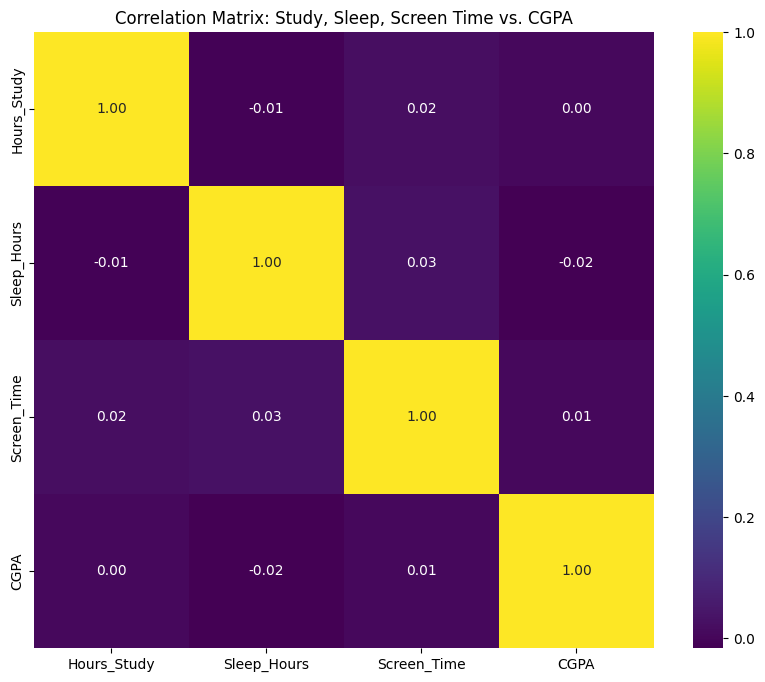

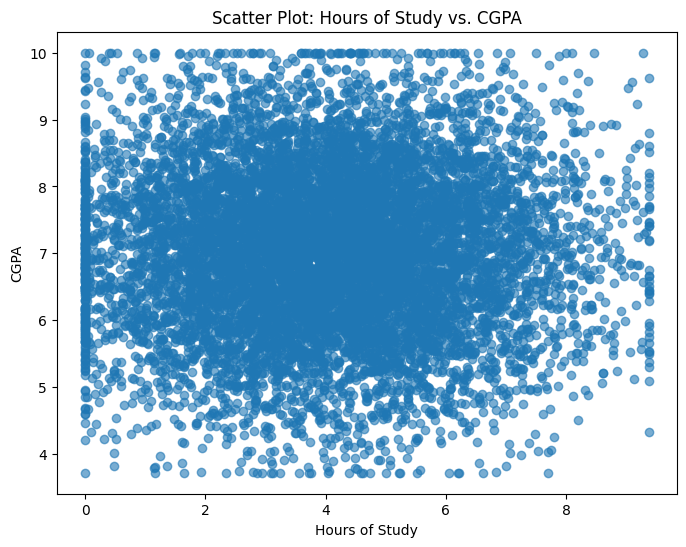

C:\Users\ahite\AppData\Local\Temp\ipykernel_13276\807608539.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x='Stress_Level', y='CGPA', data=df, palette='pastel')


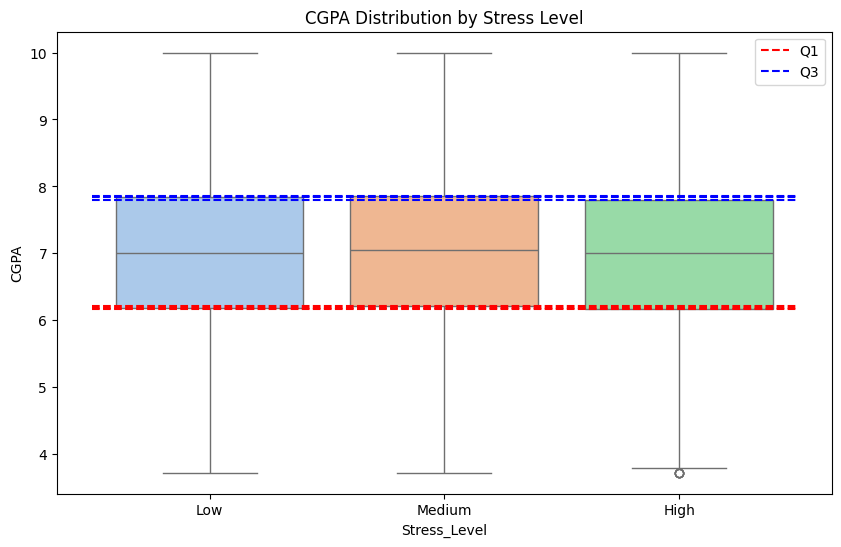

C:\Users\ahite\AppData\Local\Temp\ipykernel_13276\807608539.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x='Extracurricular', y='CGPA', data=df, palette='pastel')


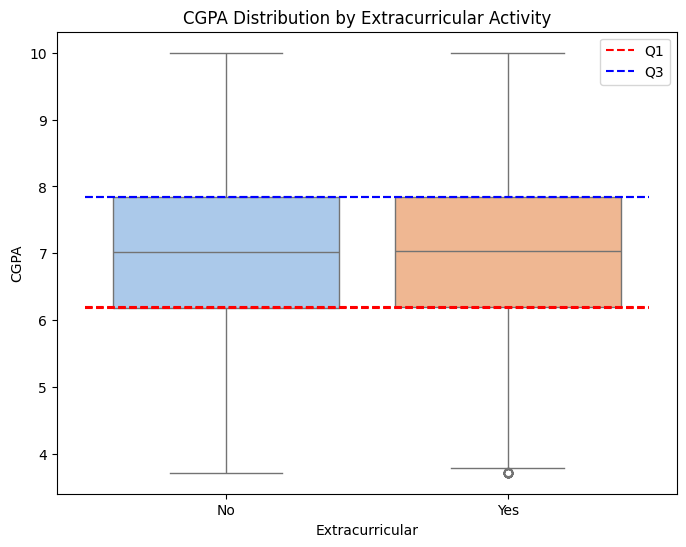


Key Insights:
1. Study Hours vs. CGPA: Strong positive correlation . More study time is linked to higher grades.
2. Stress & Performance: Students with low stress have the highest average CGPA (7.02), while high stress is linked to the lowest (6.98).
3. Screen Time: More screen time is negatively correlated with CGPA (r=0.01).
4. Extracurriculars: Students in activities have a slightly higher average CGPA (7.02 vs 7.01).
5. Sleep Matters: Getting more sleep is positively correlated with CGPA (r=0.02).


In [35]:
# Call the function to see output and graphs in the notebook
analyze_and_clean_student_data('student_wellbeing_dataset.csv', 'cleaned_student_wellbeing.csv')